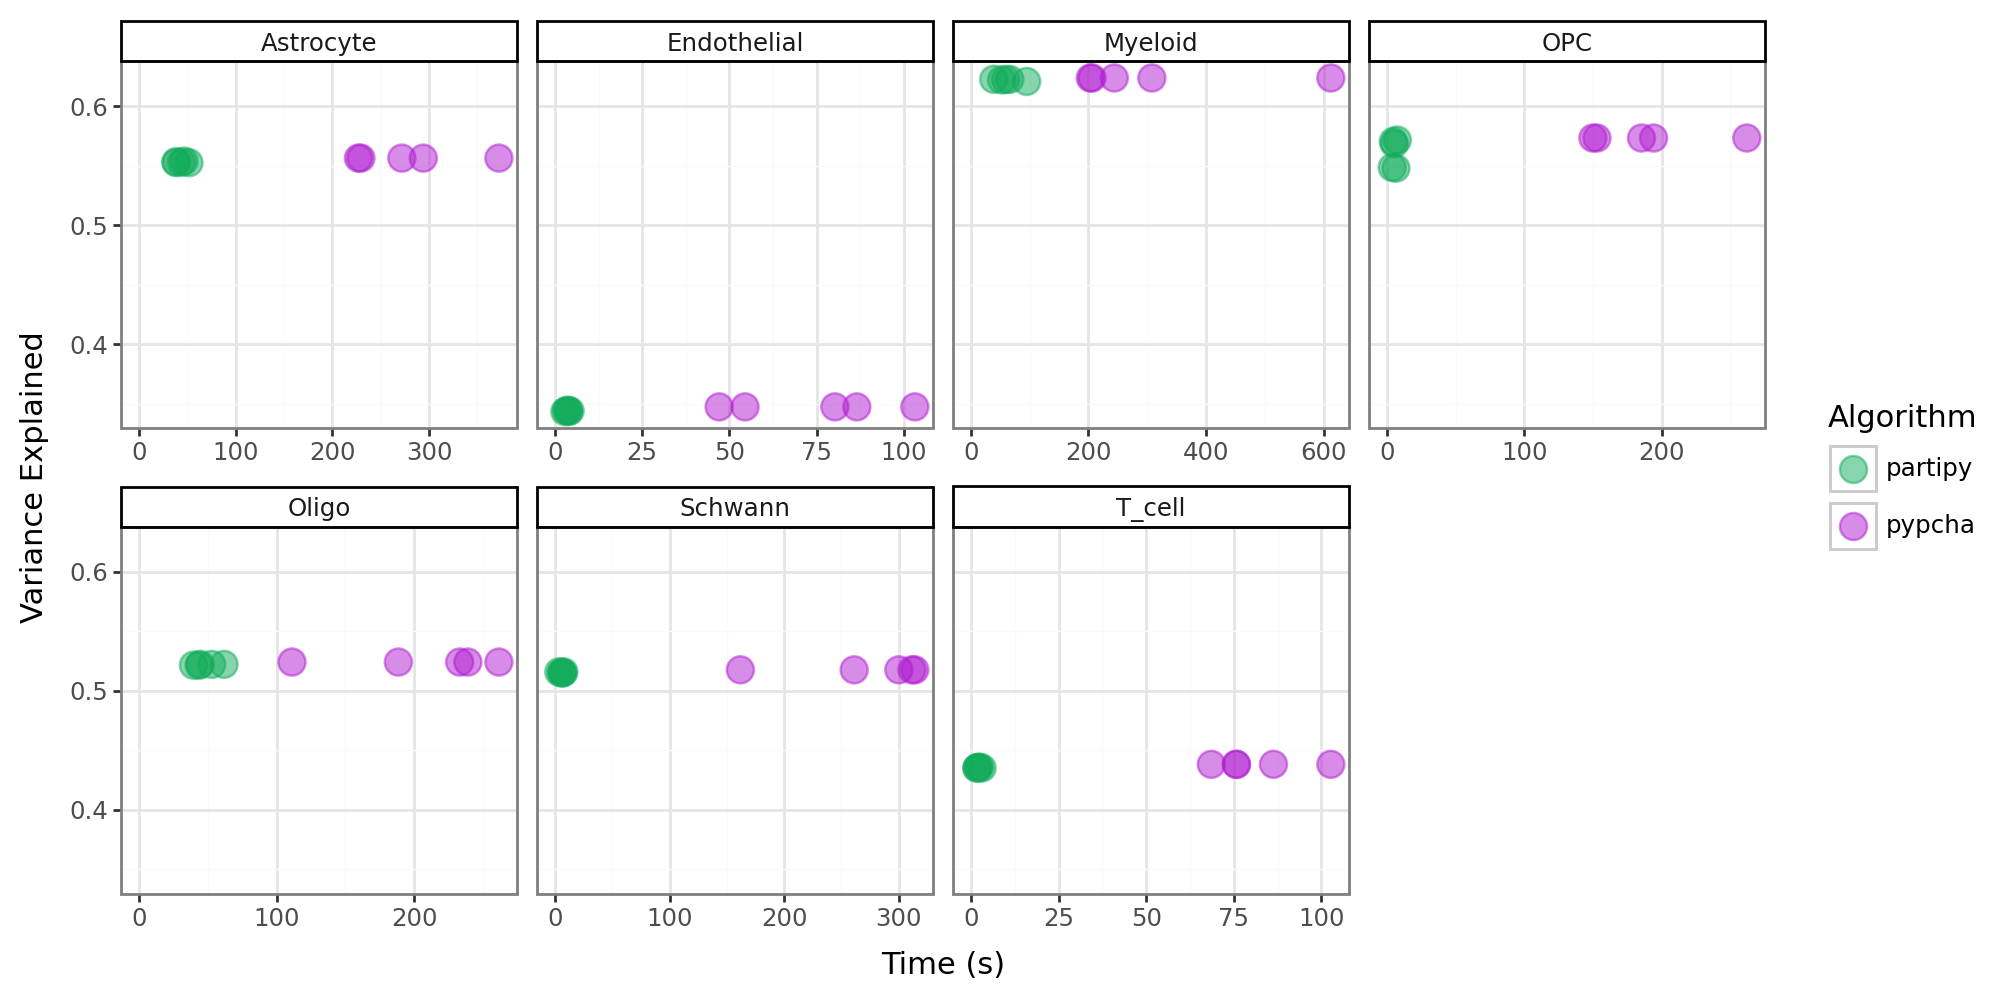

In [ ]:
import pandas as pd
import plotnine as pn

result_df = pd.read_csv("/home/pschaefer/sds-hd/sd22b002/projects/ParTIpy_paper/output/mx_xenium_pypcha/results.csv")

df_plot = result_df[
    [
        "partipy_time_mean",
        "pypcha_time_mean",
        "partipy_varexpl_mean",
        "pypcha_varexpl_mean",
        "celltype",
        "seed",
    ]
]
df_plot = df_plot.melt(id_vars=["celltype", "seed"])
df_plot["algorithm"] = [v.split("_")[0] for v in df_plot["variable"]]
df_plot["statistic"] = [v.split("_")[1] for v in df_plot["variable"]]
df_plot = df_plot.drop(columns=["variable"])
df_plot = df_plot.pivot(
    index=["celltype", "algorithm", "seed"], columns="statistic", values="value"
)
df_plot = df_plot.reset_index()

color_map = {"partipy": "#10AC5B", "pypcha": "#B01CD1"}

p = (
    pn.ggplot(df_plot)
    + pn.geom_point(pn.aes(x="time", y="varexpl", color="algorithm"), size=5, alpha=0.5)
    + pn.facet_wrap("celltype", scales="free_x", ncol=4)
    + pn.scale_color_manual(values=color_map)
    + pn.theme_bw()
    + pn.theme(
        figure_size=(10, 5),
        strip_background=pn.element_rect(fill="none", color="black")
    )
    + pn.labs(x="Time (s)", y="Variance Explained", color="Algorithm")
    + pn.xlim(0, None)
)

p.show()

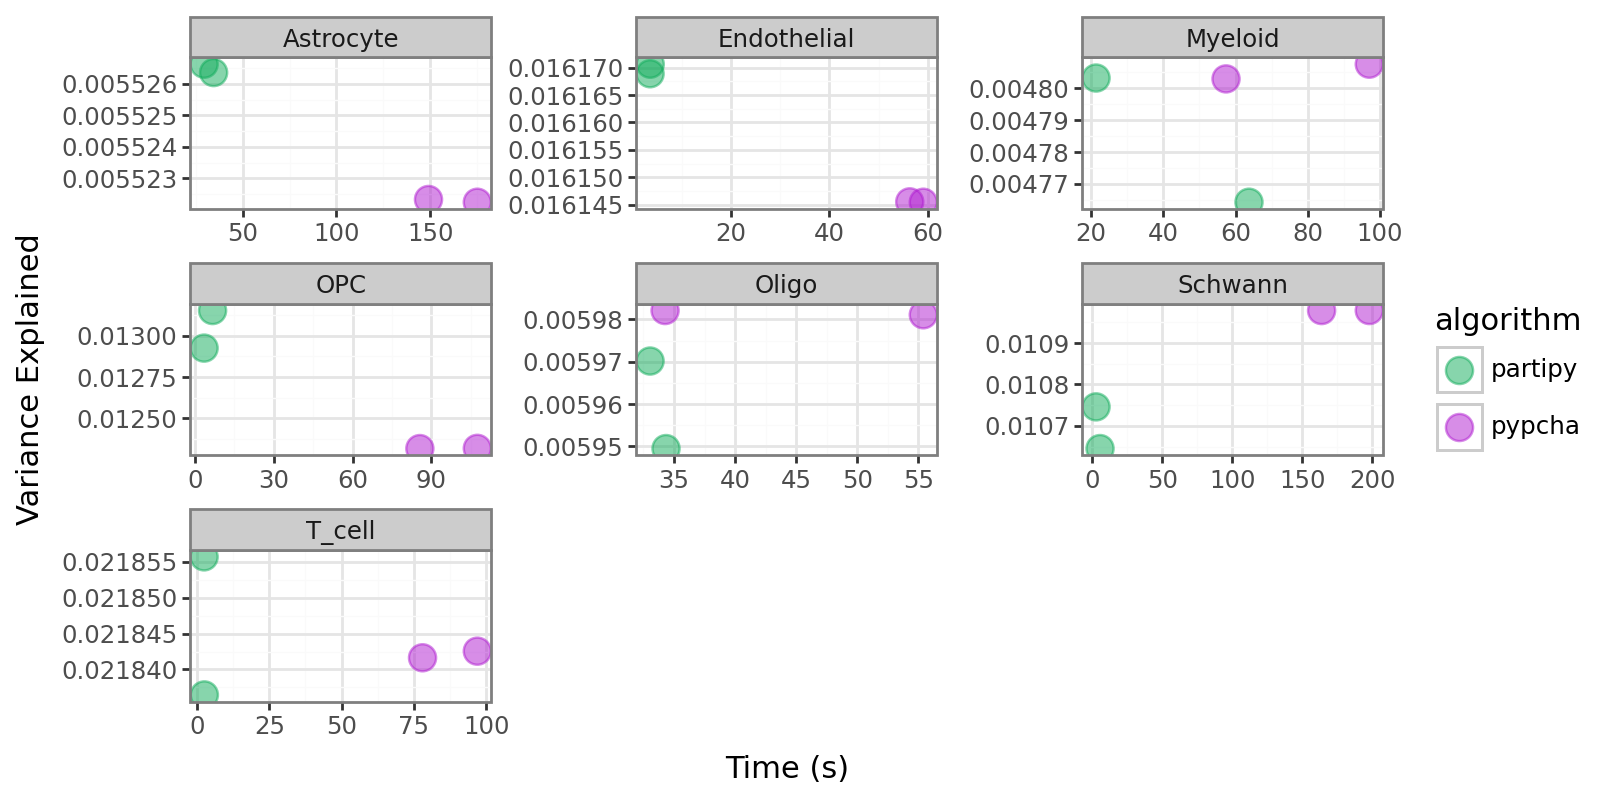

In [6]:
import pandas as pd
import plotnine as pn

result_df = pd.read_csv("/home/pschaefer/sds-hd/sd22b002/projects/ParTIpy_paper/output/mx_xenium_pypcha/results.csv")

df_plot = result_df[
    [
        "partipy_time_mean",
        "pypcha_time_mean",
        "partipy_rss_mean",
        "pypcha_rss_mean",
        "celltype",
        "seed",
    ]
]
df_plot = df_plot.melt(id_vars=["celltype", "seed"])
df_plot["algorithm"] = [v.split("_")[0] for v in df_plot["variable"]]
df_plot["statistic"] = [v.split("_")[1] for v in df_plot["variable"]]
df_plot = df_plot.drop(columns=["variable"])
df_plot = df_plot.pivot(
    index=["celltype", "algorithm", "seed"], columns="statistic", values="value"
)
df_plot = df_plot.reset_index()

color_map = {"partipy": "#10AC5B", "pypcha": "#B01CD1"}

p = (
    pn.ggplot(df_plot)
    + pn.geom_point(pn.aes(x="time", y="rss", color="algorithm"), size=5, alpha=0.5)
    + pn.facet_wrap("celltype", scales="free")
    + pn.scale_color_manual(values=color_map)
    + pn.theme_bw()
    + pn.theme(figure_size=(8, 4))
    + pn.labs(x="Time (s)", y="Variance Explained")
)

p.show()